#Word Embeddings

##GloVe

GloVe is an unsupervised algorithm which learns vector representations for words. It is trained on aggregated word-word co-occurrence statistics and the resulting vectors expose linear substructures.

It is based on matrix factorization techniques on the word-context matrix. A large matrix of co-occurrence information is constructed and you count each “word” (the rows), and how frequently we see this word in some “context” (the columns) in a large corpus.
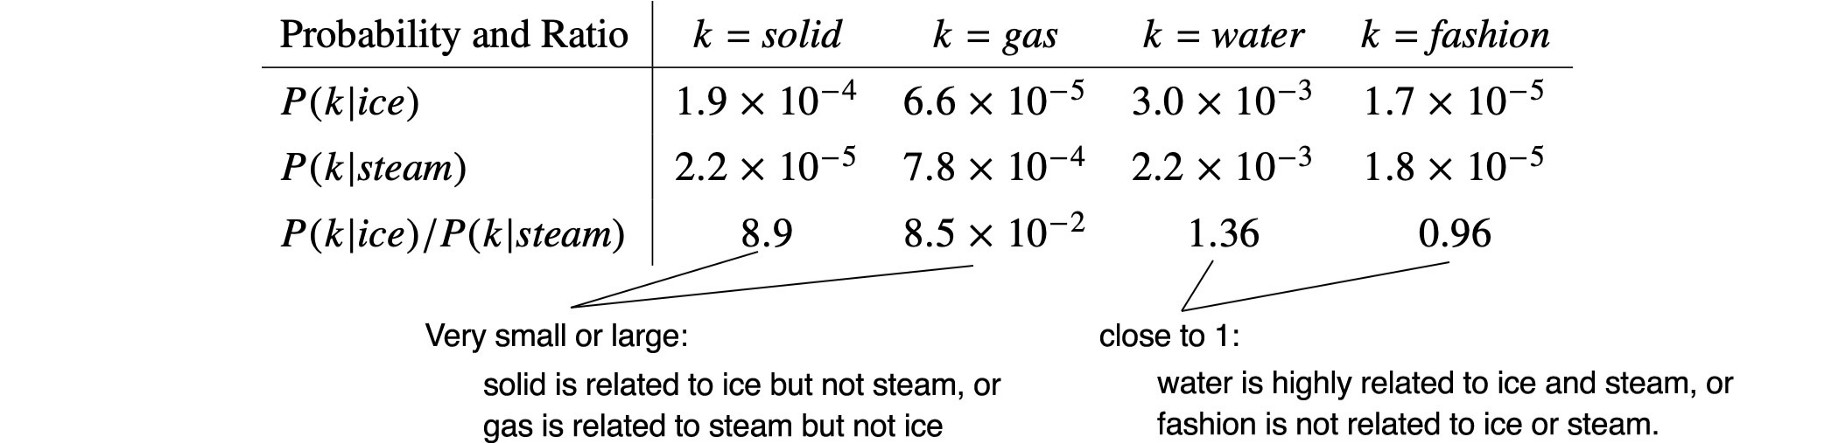

###Pretrain GloVe

The [original archive](https://nlp.stanford.edu/projects/glove/) contains text-encoded vectors of various sizes: 50-dimensional, 100-dimensional, 200-dimensional, 300-dimensional. 
The algorithm was proposed by Standford but there is a [ pretrain spanish model](https://github.com/dccuchile/spanish-word-embeddings) 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-01-17 19:29:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-01-17 19:29:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-17 19:29:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import numpy as np

embeddings_index = {}
with open('/content/glove.6B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
def find_similar_word(emmbedes):
  nearest = sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], emmbedes))
  return nearest

In [ ]:
find_similar_word(embeddings_index['woman'])[0:10]

['woman',
 'man',
 'mother',
 'girl',
 'she',
 'herself',
 'person',
 'her',
 'wife',
 'another']

Spanish pretrain GloVe

In [1]:
!wget http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz

--2022-02-21 02:05:59--  http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz
Resolving dcc.uchile.cl (dcc.uchile.cl)... 192.80.24.11
Connecting to dcc.uchile.cl (dcc.uchile.cl)|192.80.24.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz [following]
--2022-02-21 02:06:00--  https://www.dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz
Resolving www.dcc.uchile.cl (www.dcc.uchile.cl)... 192.80.24.11, 200.9.99.213
Connecting to www.dcc.uchile.cl (www.dcc.uchile.cl)|192.80.24.11|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://users.dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz [following]
--2022-02-21 02:06:02--  https://users.dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz
Resolving users.dcc.uchile.cl (users.dcc.uchile.cl)... 200.9.99.211, 192.80.24.4
Connecting to users.dcc.uchile.cl (u

In [2]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = '/content/glove-sbwc.i25.vec.gz'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [5]:
wordvectors.most_similar(['mujer'])

[('mujeres', 0.7189896106719971),
 ('niña', 0.7006014585494995),
 ('hombre', 0.6848506927490234),
 ('ella', 0.6589900851249695),
 ('joven', 0.6512529253959656),
 ('madre', 0.6361616849899292),
 ('esposa', 0.6239593625068665),
 ('igualdad', 0.6224700212478638),
 ('víctima', 0.616662323474884),
 ('persona', 0.6132028102874756)]

In [3]:
wordvectors.most_similar_cosmul(positive=['rey','mujer'],negative=['hombre'])


[('reina', 0.9141066670417786),
 ('isabel', 0.8743277192115784),
 ('princesa', 0.843113124370575),
 ('infanta', 0.8425983190536499),
 ('monarca', 0.8357319831848145),
 ('hija', 0.8211697936058044),
 ('consorte', 0.8179485201835632),
 ('iv', 0.813984215259552),
 ('esposa', 0.8115167617797852),
 ('ii', 0.8099035024642944)]

In [4]:
wordvectors.most_similar_cosmul(positive=['jugar','canta'],negative=['cantar'])


[('juega', 0.894400417804718),
 ('jugando', 0.8376926183700562),
 ('jugará', 0.8343482613563538),
 ('jugador', 0.8295056819915771),
 ('jugó', 0.8156978487968445),
 ('jugado', 0.8147079348564148),
 ('futbolista', 0.7927162647247314),
 ('juegue', 0.7921290993690491),
 ('fútbol', 0.7888966202735901),
 ('juegan', 0.7832154631614685)]